In [19]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))

In [20]:
# BASELINE
# TFIDF
# SICK_VERBADJNOUN_lemma	0.611	0.091		# TFIDF
# SICK_ADJNOUN_lemma	0.558	0.111			# TFIDF
# SICK_VERBADJNOUN_orth	0.568	0.106		# TFIDF
# SICK_ADJNOUN_orth	0.542	0.119			# TFIDF

In [221]:
sick_test = pd.DataFrame.from_csv('SA_results/SICK_test_annotated.txt', sep='\t', header=0)
sick_test_overlap = pd.DataFrame.from_csv('SA_results/semeval_overlap_test.tsv', sep='\t', header=0)
print(sick_test['relatedness_score'].corr(sick_test_overlap['relatedness_score']))
sick_test = sick_test.reset_index()
#0.62701073200106172

0.627010732001


In [103]:
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

results_all = pd.DataFrame.from_csv('SA_results/scores_all_new.tsv', sep='\t', index_col=['crossfold_id','dev_file_index'])
results_all['dependency available'] = results_all.apply(lambda row: 'NO' if 'blanked' in row.train_data_path else 'YES', axis=1)
results_all['order aware'] = results_all.apply(lambda row: 'YES' if 'LSTM' in row.tree_embedder else 'NO', axis=1)
#results_all = results_all.set_index(['dependency available', 'order aware'])
results_all['pearson_tfidf'] = 0.618864
results_all['mse_tfidf'] = 0.082341
#results_all.set_index(['crossfold_id','dev_file_index'])
results_all#[:10]

clipping      optimizer  lexicon_trainable  \
crossfold_id dev_file_index                                               
0            0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
1            0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             3               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
             4               5         AdamOptimizer  False               
2            0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             0               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             1               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             2               5         AdamOptimizer  False               
             3               5         AdamOptimizer  

In [23]:
res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']].set_index(['dependency available', 'order aware']).rename(columns={'score_pearson': 'pearson', 'score_mse':'mse'})
res

,,pearson,mse,pearson_tfidf,mse_tfidf
dependency available,order aware,,,,
NO,NO,0.839656,0.028558,0.618864,0.082341
YES,NO,0.842555,0.026927,0.618864,0.082341
NO,YES,0.837874,0.020711,0.618864,0.082341
YES,YES,0.839254,0.020170,0.618864,0.082341
NO,NO,0.835462,0.029643,0.618864,0.082341
YES,NO,0.838937,0.027700,0.618864,0.082341
NO,YES,0.833905,0.021339,0.618864,0.082341
YES,YES,0.839310,0.020403,0.618864,0.082341
NO,NO,0.839617,0.027691,0.618864,0.082341


In [24]:
# get subsets
#res.xs('NO', level='dependency available')
#res.xs('NO', level='order aware')
s = res.xs(('NO', 'NO'), level=['order aware', 'dependency available'])
#pd.Series(s['pearson'])

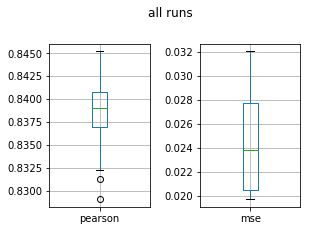

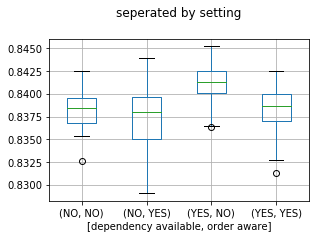

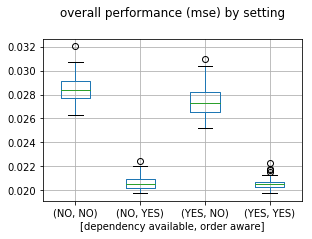

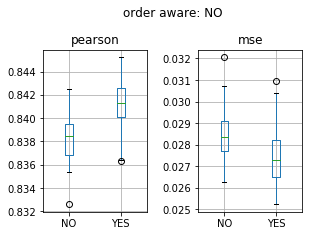

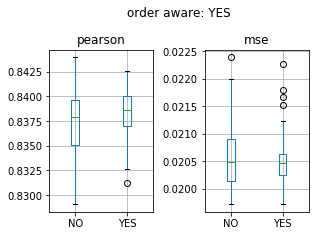

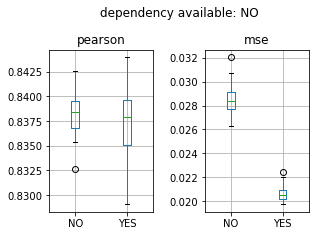

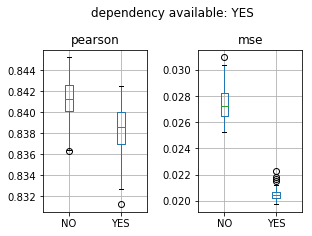

In [25]:
from matplotlib import rcParams

#rcParams['axes.titlepad'] = 20 
#rcParams['axes.titlepad'] = 20 
images = {}
bootstrap=10000

figsize = (4.5, 3)
fig_merged, axs = plt.subplots(1,2, figsize=figsize)
res.boxplot(column=['pearson'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[0], bootstrap=bootstrap)
#axs[0].minorticks_on()
#axs[0].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
res.boxplot(column=['mse'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[1], bootstrap=bootstrap)
#axs[1].minorticks_on()
#axs[1].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
fig_merged.suptitle('all runs', y=1.05)
plt.subplots_adjust(wspace=0.5)
images['fig_merged'] = fig_merged

y_title = 1.0
y_suptitle = 1.1

axs = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('seperated by setting', y=y_suptitle)
fig_sep_pearson = axs.get_figure()
fig_sep_pearson.suptitle('')
images['fig_sep_pearson'] = fig_sep_pearson

axs = res.boxplot(column=['mse'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('overall performance (mse) by setting', y=y_suptitle)
fig_sep_mse = axs.get_figure()
fig_sep_mse.suptitle('')
images['fig_sep_mse'] = fig_sep_mse

fig_sep_dep_orderno, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('NO', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderno.suptitle('order aware: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderno'] = fig_sep_dep_orderno

fig_sep_dep_orderyes, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('YES', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderyes.suptitle('order aware: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderyes'] = fig_sep_dep_orderyes

fig_sep_order_depno, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('NO', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depno.suptitle('dependency available: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depno'] = fig_sep_order_depno

fig_sep_order_depyes, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('YES', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depyes.suptitle('dependency available: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depyes'] = fig_sep_order_depyes




In [26]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from math import sqrt
import scipy.stats as st

def bootstrap_convidence(values, n_iterations=1000, alpha=0.95):
    #values = res.xs(('NO', 'NO'))['pearson']
    mean_b = np.mean(values)
    std_b = np.std(values)
    n_b_root = sqrt(len(values))
    # configure bootstrap
    #n_iterations = 10000
    n_size = int(len(values) * 0.10)
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        samples = resample(values, n_samples=n_size)
        t_i = (np.mean(samples) - mean_b) * n_b_root / np.std(samples)
        stats.append(t_i)
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    
    # confidence intervals
    #print(stats)
    #p_lower = ((1.0-alpha)/2.0) * 100
    p_lower = (alpha/2.) * 100
    #p = (alpha / 2.0) * 100
    lower = numpy.percentile(stats, p_lower)
    #lower = st.t._ppf(p_lower, n_iterations-1)
    #print('lower %.2f: %.3f' % (p_lower, lower))
    #p_upper = (alpha+((1.0-alpha)/2.0)) * 100
    p_upper = (1.-alpha/2.) * 100
    #p = (1.0 - alpha / 2.0) * 100
    upper = numpy.percentile(stats, p_upper)
    #upper = st.t._ppf(p_upper, n_iterations-1)
    #print('upper %.1f: %.3f' % (p_upper, upper))
    c_intv = [mean_b + lower * std_b / n_b_root, mean_b + upper * std_b / n_b_root]
    return c_intv

#def mean_confidence(values, alpha=0.95):
#    return st.t.interval(alpha, len(values)-1, loc=np.mean(values), scale=st.sem(values))

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h


alpha = 0.5
for measure in ['pearson', 'mse']:
    print('confidence intervalls for %s (order aware, dependency available):' % measure)
    values = res[measure]
    conf_simple = mean_confidence_interval(values, confidence=1-alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % ('ALL', 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
    c_boot = bootstrap_convidence(values, alpha=alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % ('ALL', 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
    for setting in [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]:
        values = res.xs(setting)[measure]
        conf_simple = mean_confidence_interval(values, confidence=1-alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % (str(setting), 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
        c_boot = bootstrap_convidence(values=values, alpha=alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % (str(setting), 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
print('finished')  
#print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

confidence intervalls for pearson (order aware, dependency available):
ALL             50.0% confidence interval: 0.8387 and 0.8390 (0.0003) True naive
ALL             50.0% confidence interval: 0.8383 and 0.8392 (0.0009) True
('NO', 'NO')    50.0% confidence interval: 0.8380 and 0.8384 (0.0004) True naive
('NO', 'NO')    50.0% confidence interval: 0.8374 and 0.8389 (0.0015) True
('NO', 'YES')   50.0% confidence interval: 0.8372 and 0.8378 (0.0006) True naive
('NO', 'YES')   50.0% confidence interval: 0.8365 and 0.8387 (0.0022) True
('YES', 'NO')   50.0% confidence interval: 0.8411 and 0.8415 (0.0004) True naive
('YES', 'NO')   50.0% confidence interval: 0.8406 and 0.8421 (0.0015) True
('YES', 'YES')  50.0% confidence interval: 0.8380 and 0.8385 (0.0005) True naive
('YES', 'YES')  50.0% confidence interval: 0.8375 and 0.8395 (0.0020) True
confidence intervalls for mse (order aware, dependency available):
ALL             50.0% confidence interval: 0.0241 and 0.0244 (0.0004) True naive
A

In [27]:
ex_values = np.array([110, 112, 106, 90, 96, 118, 108, 114, 107, 90, 85, 84, 113, 105, 90, 104])
print(ex_values.mean())
s = ex_values.std(ddof=1)
print(s*s)
alpha = 0.05
high_p = 1. - (alpha / 2.)
low_p = alpha / 2.
print(low_p)
print(high_p)
low = np.percentile(ex_values, low_p * 100)
high = np.percentile(ex_values, high_p * 100)
print(low)
print(high)

print(mean_confidence_interval(ex_values))

102.0
123.733333333
0.025
0.975
84.375
116.5
(102.0, 96.072679350832317, 107.92732064916768)


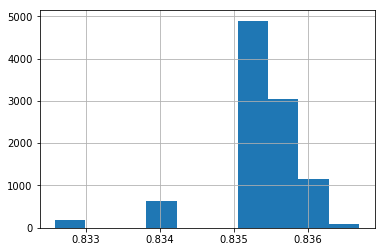

In [28]:
from sklearn.utils import resample
def bootstrap_5th_percentile(data, n_bootstraps):
    bootstraps = []
    for _ in xrange(n_bootstraps):
        # Sample with replacement from data
        samples = resample(data)
        # Then we take the fifth percentile!
        bootstraps.append(np.percentile(samples, len(data) * 0.1))
    return pd.Series(bootstraps)
values = res.xs(('NO', 'NO'))['pearson']
bootstraps = bootstrap_5th_percentile(values, 10000)
bootstraps.hist()

In [29]:
import subprocess
path = "SA_results/images"
for name in images:
    p = os.path.join(path, name)
    # save figure as svg
    images[name].savefig('%s.svg' % p)
    # convert for latex
    subprocess.call(['inkscape','-D','-z','--file=%s.svg' % p, '--export-pdf=%s.pdf' % p, '--export-latex'])
    print('finished %s' % p)

finished SA_results/images/fig_sep_dep_orderno
finished SA_results/images/fig_sep_order_depyes
finished SA_results/images/fig_sep_mse
finished SA_results/images/fig_sep_pearson
finished SA_results/images/fig_merged
finished SA_results/images/fig_sep_order_depno
finished SA_results/images/fig_sep_dep_orderyes


In [106]:
print('pearson       mean:  %f' % res[['pearson']].mean().values[0])
print('pearson        std:  %f' % res[['pearson']].std().values[0])
print('pearson_tfidf mean:  %f' % res[['pearson_tfidf']].mean().values[0])
print('mse           mean:  %f' % res[['mse']].mean().values[0])
print('mse            std:  %f' % res[['mse']].std().values[0])
print('mse_tfidf     mean:  %f' % res[['mse_tfidf']].mean().values[0])

print(res.groupby(['dependency available', 'order aware']).mean())
print(res.groupby(['dependency available', 'order aware']).std())
print(res.groupby(['dependency available']).std())
print(res.groupby(['order aware']).std())


pearson       mean:  0.838813
pearson        std:  0.002867
pearson_tfidf mean:  0.618864
mse           mean:  0.024235
mse            std:  0.003824
mse_tfidf     mean:  0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.838180  0.028394  0.618864       0.082341 
                     YES          0.837504  0.020598  0.618864       0.082341 
YES                  NO           0.841277  0.027425  0.618864       0.082341 
                     YES          0.838292  0.020524  0.618864       0.082341 
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.001873  0.001189  0.0            0.0      
                     YES          0.003102  0.000609  0.0            0.0      
YES                  NO       

In [115]:
temp = res_['mse'].reset_index().set_index(['dependency available', 'order aware'])
## get best dev_file_index (min score_mse) 
#temp['dev_file_index'].groupby('dev_file_index').min()

## get best score_mse per setting 
## ATTENTION: look up score_mse in full list to get crossfold_id! the crossfold_id displayed here is not the best one
temp[temp['dev_file_index'] == 2].groupby(['dependency available', 'order aware']).min()

crossfold_id  dev_file_index  score_mse
dependency available order aware                                         
NO                   NO           0             2               0.027594 
                     YES          0             2               0.019710 
YES                  NO           0             2               0.026044 
                     YES          0             2               0.019718

In [ ]:
#res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']]
res_ = {}
res_['pearson'] = results_all[['dependency available', 'order aware','score_pearson']]
res_['mse'] = results_all[['dependency available', 'order aware','score_mse']]
# all settings seperated
pivot = {}
pivot['pearson'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
pivot['mse'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
# spereated by order aware
pivot_merged = {'pearson':{}, 'mse':{}}
pivot_merged['pearson']['order aware'] = pd.pivot_table(res['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
pivot_merged['mse']['order aware'] = pd.pivot_table(res['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
# spereated by dependency available
#pivot_dep = {}
pivot_merged['pearson']['dependency available'] = pd.pivot_table(res['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
pivot_merged['mse']['dependency available'] = pd.pivot_table(res['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
#pivot['mse'] #['NO', 'NO'] - pivot_mse['NO', 'YES']
#pivot_['pearson']['dependency available']['NO']
pivot['mse']

In [268]:
from scipy import stats
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
for i, s1 in enumerate(settings):
    for s2 in settings[i+1:]:
        for measure in ['mse', 'pearson']:
            #%-15s %.1f
            #if s1 != s2:
            dif = pivot[measure][s2[0], s2[1]].mean() - pivot[measure][s1[0], s1[1]].mean()
            ttest = stats.ttest_ind(pivot[measure][s1[0], s1[1]], pivot[measure][s2[0], s2[1]], equal_var=False)
            print('%-14s vs %-14s %-10s: %10.4f   %.4f  %8.4f' % (str(s1), str(s2), measure, ttest[0], ttest[1], dif))

print()
measure = 'mse'
setting = 'dependency available'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))
merged = 'order aware'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))


# interesting results:
#('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908
#('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064
#('NO', 'YES')  vs ('NO', 'NO')   pearson   :    -1.3194   0.1908
#('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021
#('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745
#('YES', 'YES') vs ('NO', 'NO')   pearson   :     0.2459   0.8064
#('YES', 'YES') vs ('NO', 'YES')  mse       :    -0.6738   0.5021
#('YES', 'YES') vs ('NO', 'YES')  pearson   :     1.3679   0.1745

('NO', 'NO')   vs ('NO', 'YES')  mse       :    41.2657   0.0000   -0.0078
('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908   -0.0007
('NO', 'NO')   vs ('YES', 'NO')  mse       :     3.8365   0.0002   -0.0010
('NO', 'NO')   vs ('YES', 'NO')  pearson   :    -7.6814   0.0000    0.0031
('NO', 'NO')   vs ('YES', 'YES') mse       :    43.3097   0.0000   -0.0079
('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064    0.0001
('NO', 'YES')  vs ('YES', 'NO')  mse       :   -32.9444   0.0000    0.0068
('NO', 'YES')  vs ('YES', 'NO')  pearson   :    -7.0693   0.0000    0.0038
('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021   -0.0001
('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745    0.0008
('YES', 'NO')  vs ('YES', 'YES') mse       :    34.3888   0.0000   -0.0069
('YES', 'NO')  vs ('YES', 'YES') pearson   :     6.1891   0.0000   -0.0030
()
(merged) dependency available    mse             0.9645   0.3360   -0.0005
(merged) dependency av

In [124]:
#res_mse.hist(by='dependency available')
#plt.show
#res_mse.hist(by='order aware')
#plt.show
#res_pearson.hist(by='dependency available')
#plt.show
#res_pearson.hist(by='order aware')
#plt.show
#res_mse.hist()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(pivot_mse_order, alpha=0.7, figsize=(10, 10), diagonal='kde')

In [ ]:
scatter_matrix(pivot_pearson, alpha=0.7, figsize=(10, 10), diagonal='kde')

In [242]:
#'dependency available', 'order aware'
import os
paths = {}
paths[('NO', 'NO')] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels_blanked/6'
paths[('NO', 'YES')] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels_blanked/9'
paths[('YES', 'NO')] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels/8'
paths[('YES', 'YES')] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels/2'
sims_predicted = {}
sims_gold_ = {}
errors_ = {}
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
for setting in settings:
    sims_predicted[setting] = np.load(os.path.join(paths[setting], 'sims.np'))
    sims_gold_[setting] = np.load(os.path.join(paths[setting], 'sims_gold.np'))
    errors_[setting] =np.abs(sims_predicted[setting]-sims_gold_[setting])
sims_gold = sims_gold_[('NO', 'NO')]

In [243]:
#np.mean((np.sort(sims_predicted[('NO', 'NO')])-np.sort(sims_predicted[('YES', 'YES')]))**2)
np.mean((sims_predicted[('NO', 'NO')]-sims_gold)**2)
#np.array_equal(sims_gold[('NO', 'NO')], sims_gold[('YES', 'NO')])
#np.argwhere(sims_gold[('NO', 'NO')] != sims_gold[('YES', 'NO')]).tolist()
#print(sims_gold[('NO', 'NO')][490:510].tolist())
#print(sims_gold[('NO', 'YES')][490:510].tolist())

0.027594274

In [296]:
errors_top100 = {}
errors_top10 = {}
errors = pd.DataFrame(errors_)
errors['sentence_A'] = sick_test['sentence_A']
errors['sentence_B'] = sick_test['sentence_B']
errors['score_gold'] = sick_test['relatedness_score'].sub(1.).div(4.)
errors_dif = {}
for i, s1 in enumerate(settings):
    all_sorted = errors.sort_values(by=[s1], ascending=False)
    errors_top100[s1] = all_sorted[:100]
    errors_top10[s1] = all_sorted[:10]
    for s2 in settings[i+1:]:
        errors_dif[s1,s2] = errors[s2]-errors[s1]
        errors['%s vs %s' % (str(s1),str(s2))] = errors_dif[s1,s2]

#errors_top100[('NO', 'YES')]['score_gold'].mean()
#errors_top10[('NO', 'YES')]#[('NO', 'YES'), 'sentence_A', 'sentence_B', 'score_gold']
#errors_dif.keys() # (('NO', 'YES'), ('YES', 'YES')) #('NO', 'NO') vs ('NO', 'YES')
#errors_dif[(('NO', 'YES'), ('YES', 'YES'))]

# order aware rocks (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=True)[:10]

# order aware fails (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=False)[:10]

# order aware rocks (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES')"], ascending=True)[:10]

# order aware fails (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES')"], ascending=False)[:10]


# dep edge rocks (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=True)[:10]

# dep edge fails (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=False)[:10]

# dep edge rocks (order aware on) 
#errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=True)[:10]

# dep edge fails (order aware on) 
errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=False)[:10]

NO                 YES            \
            NO       YES        NO       YES   
4921  0.229119  0.002820  0.231481  0.327390   
2441  0.231044  0.068452  0.224373  0.350297   
4907  0.023600  0.007669  0.077805  0.285539   
4815  0.039825  0.079895  0.014909  0.357190   
1175  0.068474  0.172623  0.128326  0.447950   
4817  0.080573  0.022849  0.005492  0.293812   
2818  0.225392  0.041120  0.148950  0.293390   
4842  0.264643  0.032161  0.241151  0.266059   
4094  0.084413  0.030421  0.121132  0.263312   
669   0.215422  0.007842  0.215636  0.238935   

                                                                    sentence_A  \
                                                                                 
4921  A cheetah is chasing its prey across a field                               
2441  A woman is falling off a horse                                             
4907  One woman is peeling a potato                                              
4815  A man is sitting on the grass and drinking from a water bottle             
1175  A man is pouring a plate of cheese which is shredded into a pot of sauce   
4817  A white dog on a leash is walking in the water                             
2818  A boy is talking to a leaf                                                 
4842  A girl is playing a guitar                                                 
4094  A man is doing a trick on a bike                                           
669   A person is doing a trick with some cards                                  

                                                              sentence_B  \
                                                                           
4921  A white and brown dog is walking through the water with difficulty   
2441  A woman is frying something                                          
4907  A yellow flower is being clung to by a bee                           
4815  The child is delightedly playing with toys outdoors                  
1175  The lady is adding cheese to the sauce                               
4817  A shirtless man is playing football on a lawn                        
2818  A cat is jumping into a box                                          
4842  A woman is dancing near a fire                                       
4094  A man is doing a skateboard trick on an outdoor park porch           
669   A man is frying a tortilla                                           

     score_gold ('NO', 'NO') vs ('NO', 'YES') ('NO', 'NO') vs ('YES', 'NO')  \
                                                                              
4921  0.02500   -0.226300                      0.002362                       
2441  0.05000   -0.162592                     -0.006671                       
4907  0.00000   -0.015931                      0.054206                       
4815  0.02500    0.040070                     -0.024917                       
1175  0.65000    0.104149                      0.059851                       
4817  0.00000   -0.057724                     -0.075082                       
2818  0.00000   -0.184272                     -0.076442                       
4842  0.07500   -0.232482                     -0.023492                       
4094  0.44625   -0.053992                      0.036719                       
669   0.00000   -0.207580                      0.000214                       

     ('NO', 'NO') vs ('YES', 'YES') ('NO', 'YES') vs ('YES', 'NO')  \
                                                                     
4921  0.098270                       0.228661                        
2441  0.119253                       0.155921                        
4907  0.261939                       0.070137                        
4815  0.317364                      -0.064986                        
1175  0.379475                      -0.044298                        
4817  0.213239                      -0.017357                        
2818  0.067998              

In [257]:
for s in settings:
    print('%-14s %.4f   %.4f' % (str(s), errors_top10[s]['score_gold'].mean(), errors_top100[s]['score_gold'].std()))
    #print(errors_top100[s]['score_gold'].std())

('NO', 'NO')   0.2475   0.1528
('NO', 'YES')  0.4046   0.2352
('YES', 'NO')  0.2700   0.1552
('YES', 'YES') 0.4625   0.2459


In [258]:
errors_top10

{('NO', 'NO'):             NO                 YES            \
             NO       YES        NO       YES   
 2555  0.694075  0.336812  0.666210  0.430614   
 3272  0.645094  0.383576  0.633466  0.386096   
 1228  0.641775  0.383797  0.611279  0.378104   
 928   0.639956  0.574324  0.619999  0.602956   
 2380  0.633833  0.546090  0.587626  0.558592   
 2225  0.588371  0.369155  0.554003  0.361091   
 2394  0.579775  0.449644  0.558429  0.476059   
 3467  0.575000  0.527762  0.571191  0.541290   
 857   0.569962  0.424655  0.511911  0.417583   
 351   0.558494  0.327794  0.534057  0.397518   
 
                                                 sentence_A  \
                                                              
 2555  A cat is looking at a store counter                    
 3272  A dead bird is near a black man sitting on a tree      
 1228  A baby rhino is walking around a pen with its mother   
 928   A girl is cutting butter into two pieces               
 2380  A girl is m